# Correlation of DESI Telemetry Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from platform import python_version
print(python_version())
import datetime
import pytz
import psycopg2


start=datetime.datetime(2019,10,22,0,0,0)
utc = pytz.timezone("UTC") #America/Phoenix")
start = utc.localize(start)

# sets maximation values of correlation estimation (i.e. range from -1 to 1)
vmin = -1
vmax = 1

3.9.7


## Intra-Table Correlation

### Tower Data Correlation

In [2]:
tower_data = pd.read_pickle('../environmentmonitor_tower.pkl')
tower_labels = tower_data.drop(columns=['time_recorded']).columns.values

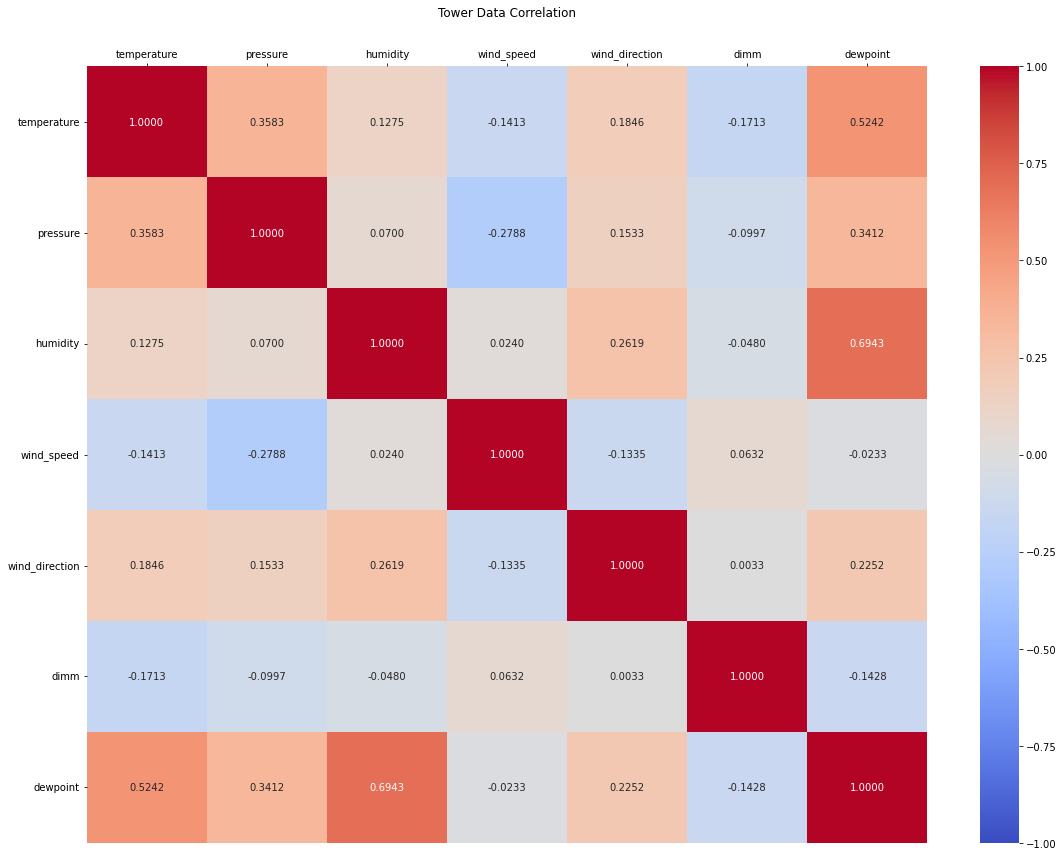

In [3]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(tower_data.corr(method='spearman'), annot=True, fmt='.4f',
            cmap=plt.get_cmap('coolwarm'), vmin=vmin, vmax=vmax, cbar=True, ax=ax)
ax.set_yticklabels(tower_labels, rotation=0)
ax.set_xticklabels(tower_labels, rotation=0)
ax.xaxis.tick_top()
ax.set_title('Tower Data Correlation', pad=50)
fig.tight_layout()
plt.savefig('tower_corr.png')
plt.show()

### Dome Data Correlation

In [4]:
dome_data = pd.read_pickle('../environmentmonitor_dome.pkl')
dome_labels = dome_data.drop(columns=['time_recorded']).columns.values

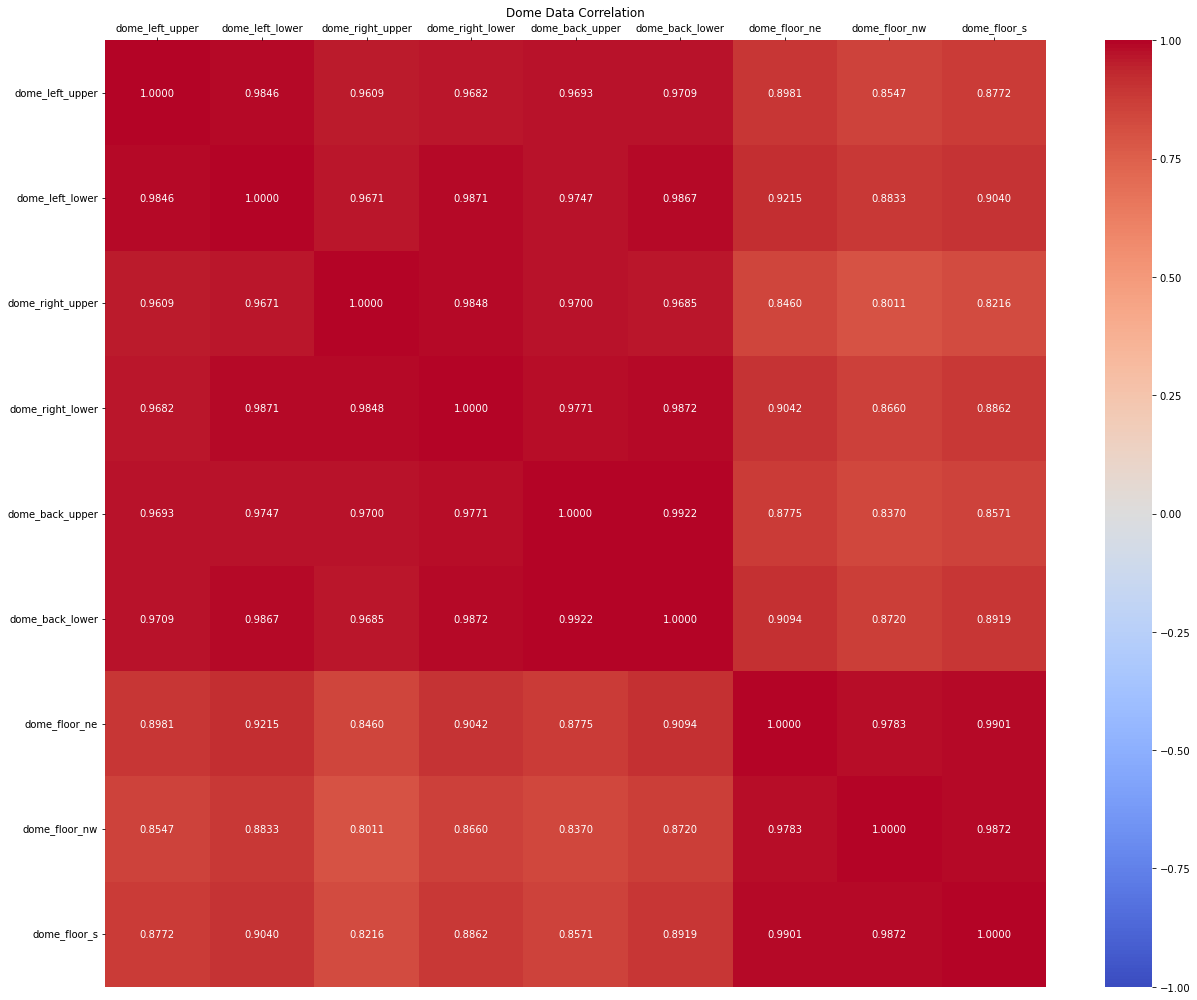

In [5]:
fig, ax = plt.subplots(figsize=(18, 14))
sns.heatmap(dome_data.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), vmin=vmin, vmax=vmax, cbar=True, ax=ax)
ax.set_yticklabels(dome_labels, rotation=0)
ax.set_xticklabels(dome_labels, rotation=0)
ax.xaxis.tick_top()
ax.set_title('Dome Data Correlation')
fig.tight_layout()
plt.savefig('dome_corr.png')
plt.show()

### Telescope Data Correlation

In [6]:
telescope_data = pd.read_pickle('../environmentmonitor_telescope.pkl')
telescope_labels = telescope_data.drop(columns=['time_recorded', 'mirror_status']).columns.values

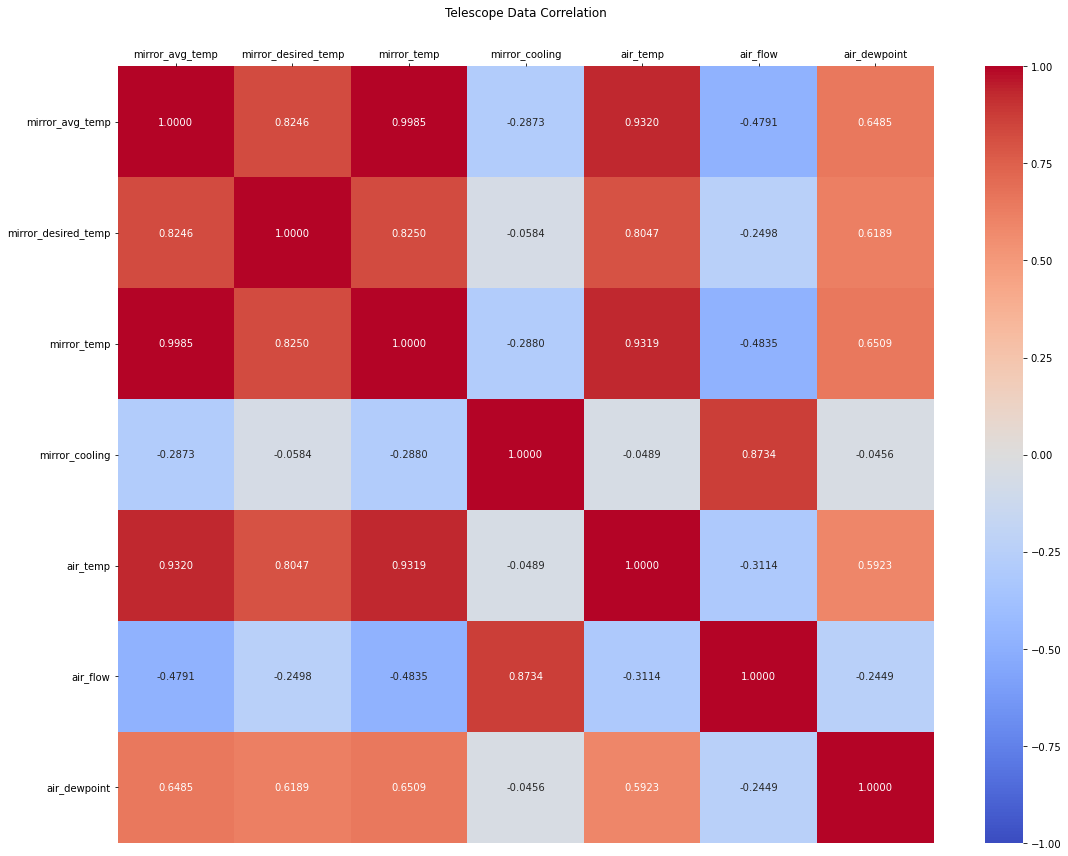

In [7]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(telescope_data.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), vmin=vmin, vmax=vmax, cbar=True, ax=ax)
ax.set_yticklabels(telescope_labels, rotation=0)
ax.set_xticklabels(telescope_labels, rotation=0)
ax.xaxis.tick_top()
ax.set_title('Telescope Data Correlation', pad=50)
fig.tight_layout()
plt.savefig('telescope_corr.png')
plt.show()

# ETC Telemetry Correlation Matrix

In [8]:
etc_telemetry_data = pd.read_pickle('../etc_telemetry.pkl')
etc_telemetry_labels = etc_telemetry_data.drop(columns=['time_recorded']).columns.values

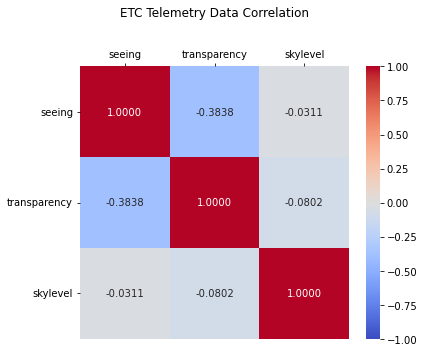

In [9]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(etc_telemetry_data.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), vmin=vmin, vmax=vmax, cbar=True, ax=ax)
ax.set_yticklabels(etc_telemetry_labels, rotation=0)
ax.set_xticklabels(etc_telemetry_labels, rotation=0)
ax.xaxis.tick_top()
ax.set_title('ETC Telemetry Data Correlation', pad=50)
fig.tight_layout()
plt.savefig('etc_telemetry_corr.png')
plt.show()

# ETC Seeing Correlation Matrix

In [10]:
etc_seeing_data = pd.read_pickle('../etc_seeing.pkl')
etc_seeing_labels = etc_seeing_data.drop(columns=['time_recorded']).columns.values

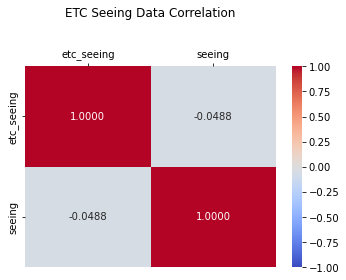

In [11]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(etc_seeing_data.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), vmin=vmin, vmax=vmax, cbar=True, ax=ax)
ax.set_yticklabels(etc_seeing_labels)
ax.set_xticklabels(etc_seeing_labels)
ax.xaxis.tick_top()
ax.set_title('ETC Seeing Data Correlation', pad=50)
fig.tight_layout()
plt.savefig('etc_seeing_corr.png')
plt.show()

### TCS Info Correlation Matrix

In [12]:
tcs_info_data = pd.read_pickle('../tcs_info.pkl')
tcs_info_labels = tcs_info_data.drop(columns=['time_recorded']).columns.values

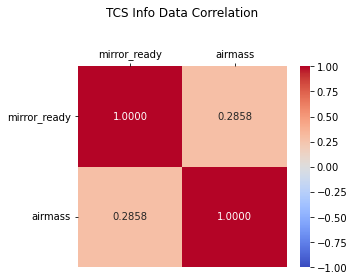

In [13]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(tcs_info_data.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), vmin=vmin, vmax=vmax, cbar=True, ax=ax)
ax.set_yticklabels(tcs_info_labels, rotation=0)
ax.set_xticklabels(tcs_info_labels, rotation=0)
ax.xaxis.tick_top()
ax.set_title('TCS Info Data Correlation', pad=50)
fig.tight_layout()
plt.savefig('tcs_info_corr.png')
plt.show()

## Inter-Table Data Correlation (Before Time Syncronization)

### Temperature Correlation (Before Time Syncronization)

In [14]:
temperature_data = pd.DataFrame()
temperature_data['tower_temp'] = tower_data['temperature']
for i in dome_labels:
    temperature_data[i] = dome_data[i]
temperature_data['mirror_temp'] = telescope_data['mirror_temp']
temperature_data['mirror_avg_temp'] = telescope_data['mirror_avg_temp']
temperature_data['mirror_desired_temp'] = telescope_data['mirror_desired_temp']
temperature_data['air_temp'] = telescope_data['air_temp']
temperature_labels = temperature_data.columns.values

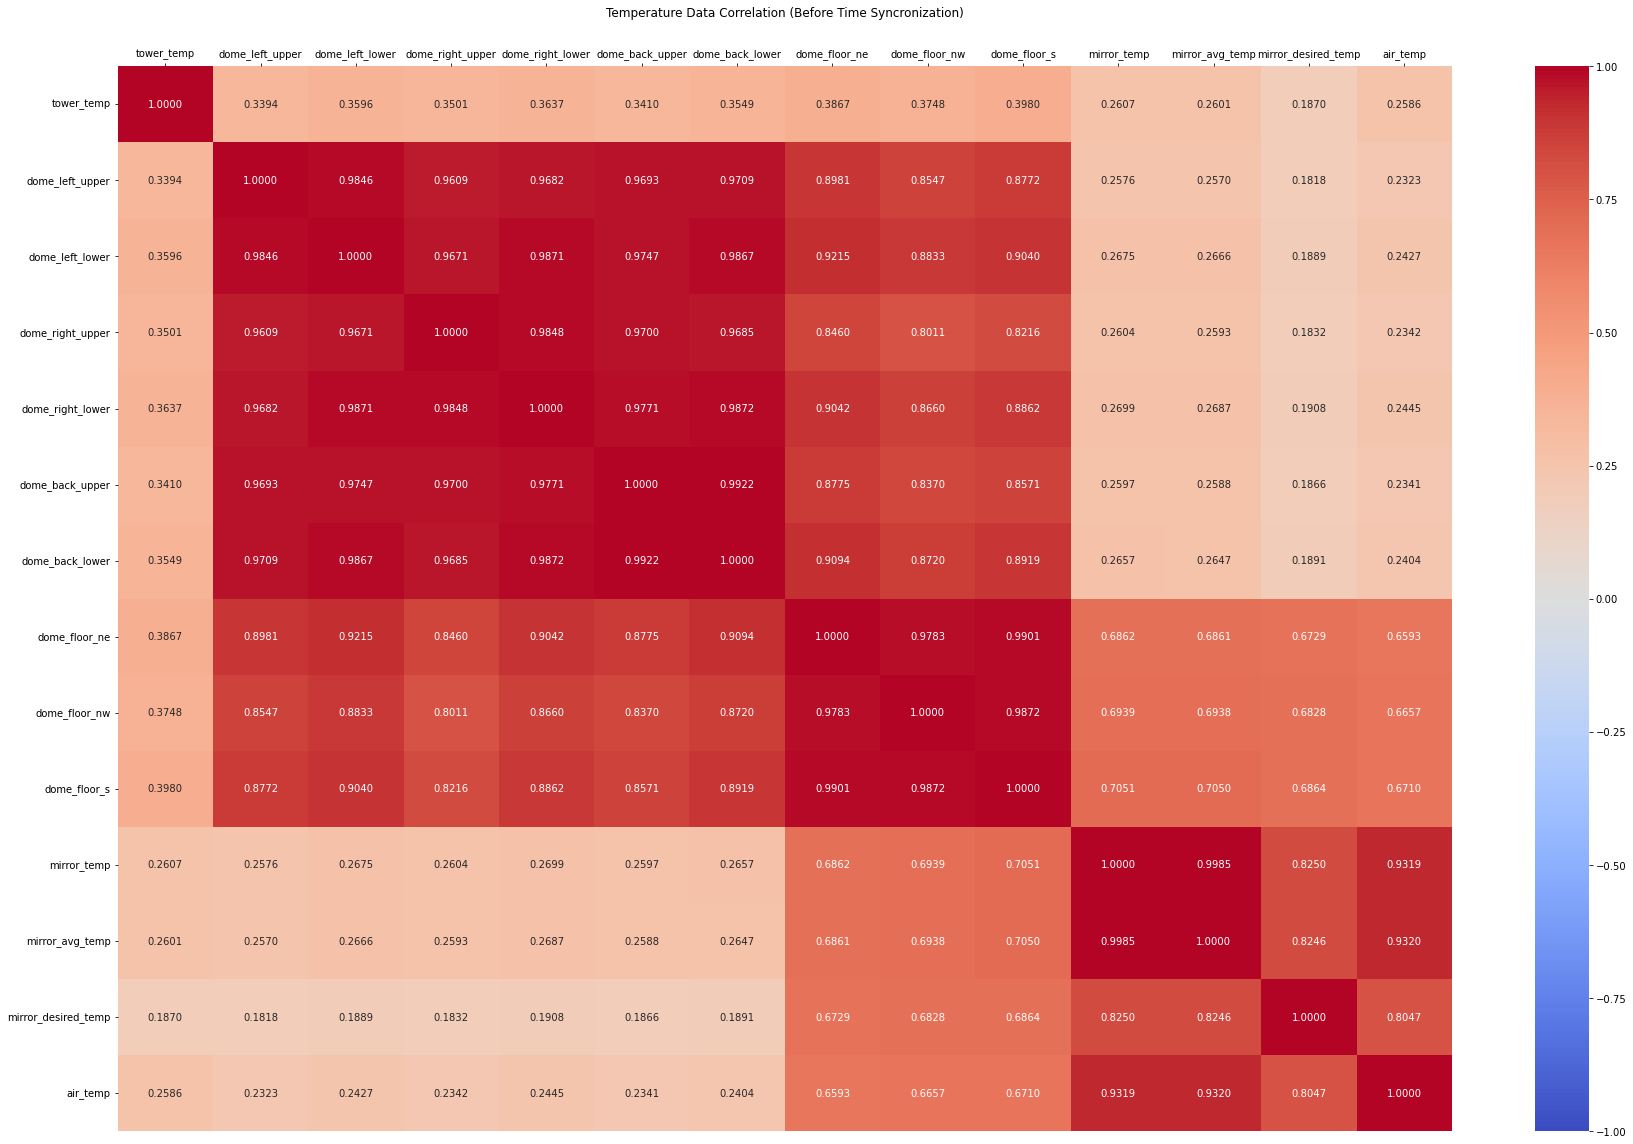

In [19]:
fig, ax = plt.subplots(figsize=(25, 16))
sns.heatmap(temperature_data.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), vmin=vmin, vmax=vmax, cbar=True, ax=ax)
ax.set_yticklabels(temperature_labels, rotation=0)
ax.set_xticklabels(temperature_labels, rotation=0)
ax.xaxis.tick_top()
ax.set_title('Temperature Data Correlation (Before Time Syncronization)', pad=50)
fig.tight_layout()
plt.savefig('temp_corr_before_sync.png')
plt.show()

### Mirror Temperature and Seeing Correlation (Before Time Syncronization)

In [16]:
mirror_and_seeing = pd.DataFrame()
mirror_and_seeing['tower_temp'] = tower_data['temperature']
mirror_and_seeing['mirror_avg_temp'] = telescope_data['mirror_avg_temp']
mirror_and_seeing['mirror_desired_temp'] = telescope_data['mirror_desired_temp']
mirror_and_seeing['air_temp'] = telescope_data['air_temp']
mirror_and_seeing['mirror_temp'] = telescope_data['mirror_temp']
mirror_and_seeing['seeing'] = etc_telemetry_data['seeing']
mirror_and_seeing_labels = mirror_and_seeing.columns.values

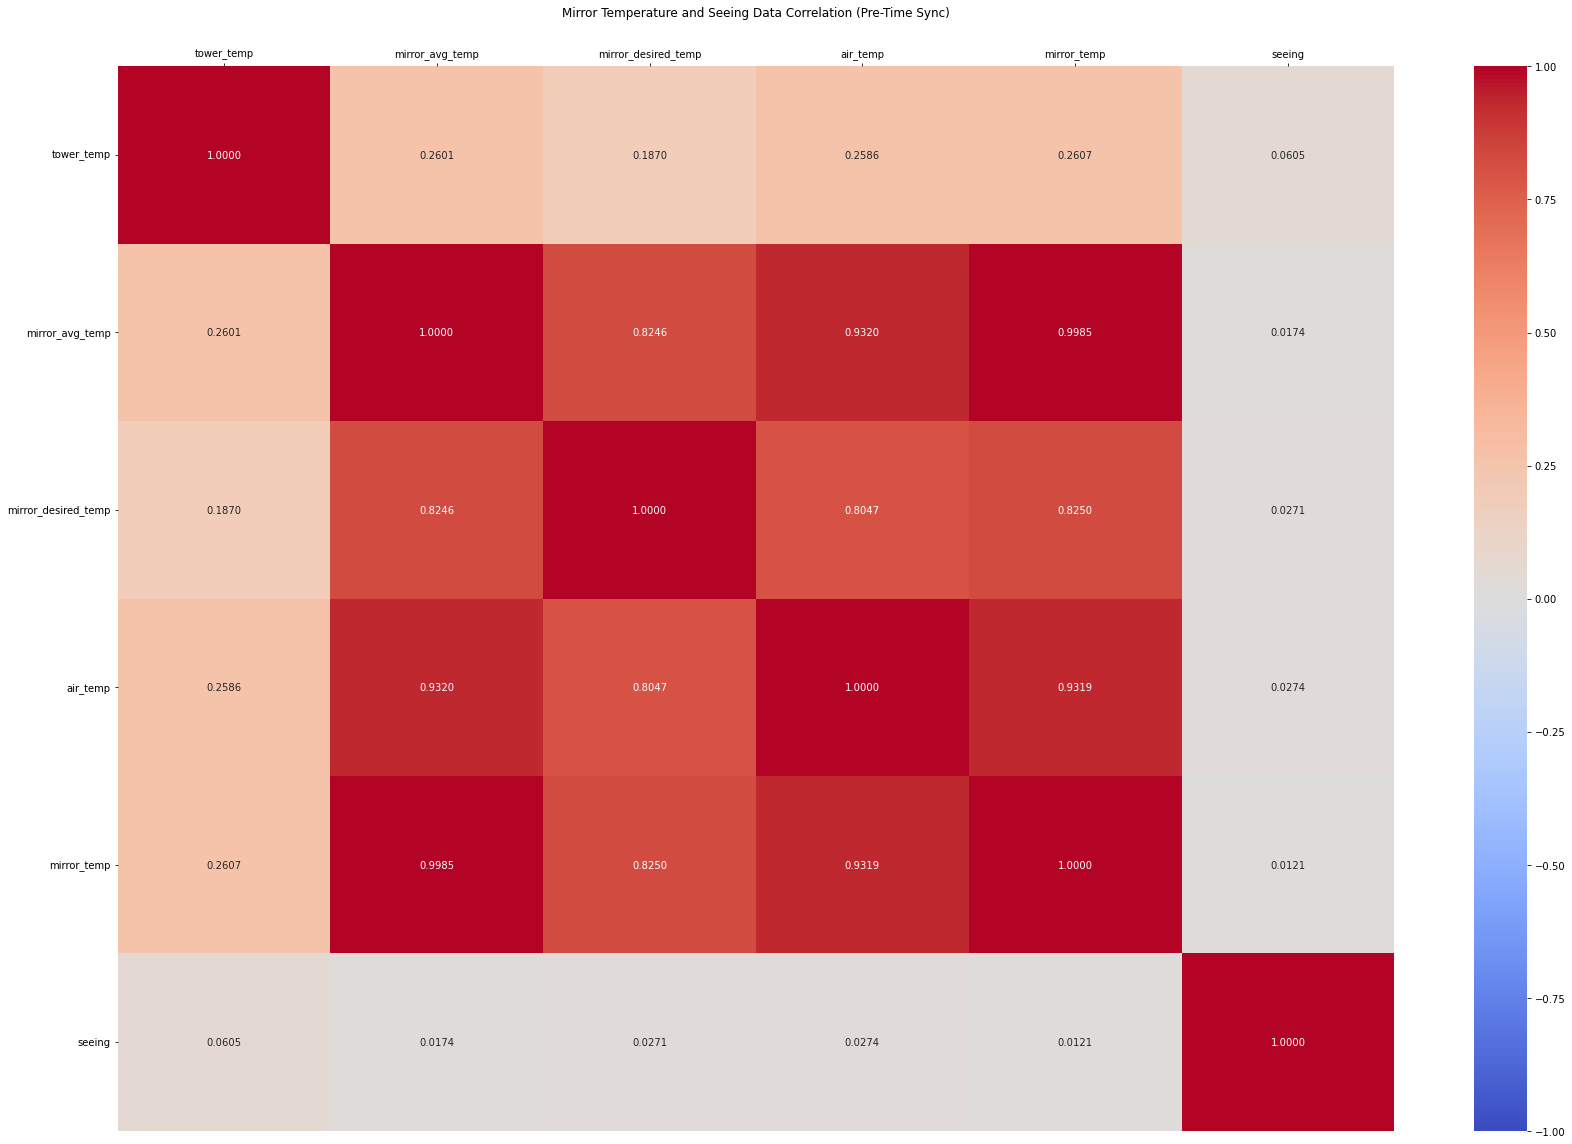

In [17]:
fig, ax = plt.subplots(figsize=(24, 16))
sns.heatmap(mirror_and_seeing.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), vmin=vmin, vmax=vmax, cbar=True, ax=ax)
ax.set_yticklabels(mirror_and_seeing_labels, rotation=0)
ax.set_xticklabels(mirror_and_seeing_labels, rotation=0)
ax.xaxis.tick_top()
ax.set_title('Mirror Temperature and Seeing Data Correlation (Before Time Syncronization)', pad=50)
fig.tight_layout()
plt.savefig('mirror_and_seeing_corr_before_sync.png')
plt.show()